In [1]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
### 1. Link notebook with google drive and access data from your personal Gdrive
from google.colab import drive
drive.mount('/content/gdrive')

### 2.Set the data path for dataset and model location (ex: model_loc = "/content/gdrive/My Drive/Dataset/")
dataset_dir = "/content/gdrive/My Drive/ColabNotebooks/"
model_loc = "/content/gdrive/My Drive/ColabNotebooks/"

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir+'heart.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['Entrez_inclassexe.ipynb', 'Entrez_inclassexe2.ipynb', 'Task2_PhangChengYi_GohYitian.ipynb', 'Task1_PhangChengYi_GohYitian.ipynb', 'In Group Activity 1.ipynb', 'PSM1_v1.ipynb', 'penguin_size.ipynb', 'penguin_lter.ipynb', 'PSM1_v2.ipynb', 'PSM1_v4.ipynb', 'PSM1_v3.ipynb', 'PSM2_v1.ipynb', 'PSM2_v3_single word.ipynb', 'PSM2_v2_preprocessed_keyword.ipynb', 'heart.csv', 'Untitled0.ipynb', '[1_April_2024]_Heart_Disease_NN_PhangChengYi.ipynb']


In [3]:
### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets.

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.shape

(303, 14)

In [6]:
# Check out summary of statistics of numeric columns
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Check the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Check missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function?
###  The purpose is to convert specific columns in the Dataframe 'data' to the data type 'object' for each item in the list 'categorialList',
###  to ensure that these variables are treated as categorical variables for the following analysis or modeling process.

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

In [10]:
 ### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function
data = pd.get_dummies(data, drop_first=True)

<ipython-input-10-80e670da85f6>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-10-80e670da85f6>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-10-80e670da85f6>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-10-80e670da85f6>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-10-80e670da85f6>:2: FutureWarning: In a future version, t

In [11]:
### 6. Explain line 3,4 and 5 and print the shape of x and y
y = data['target'].values #take the target value
y = y.reshape(y.shape[0],1) #reshape y array into 1 dimension
x = data.drop(['target'],axis=1) #drop 'target' in x data
y.shape

(303, 1)

In [12]:
y.size

303

In [13]:
x.shape

(303, 21)

In [14]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset
data = pd.DataFrame({'A': [10,20,30], 'B': [100,200,300], 'C': [1000,2000,3000]})
print('Original dataset:')
print(data)


Original dataset:
    A    B     C
0  10  100  1000
1  20  200  2000
2  30  300  3000


In [15]:
### 8. Describe the heart dataset after implementing the min max normalization
#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,trestbps,chol,thalach,oldpeak,slope,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# # re-create train and validation set
# x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# train 70%, validation 20%, test 10%
# Splitting the data into train and test sets (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Splitting the remaining training data into train and validation sets (80% train, 20% validation)
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(169, 21)
(43, 21)
(91, 21)


In [17]:
y.size

303

In [18]:
### 10. What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons,
### respectively, and softmax and sigmoid activation functions?
###     In this network, the input layer is assumed to be present implicitly. There are two hidden layers with 64 and 32 neurons respectively. The output layer consists of a single neuron.
###     Softmax activation function is used in the hidden layers for classification tasks to convert the raw output of each neuron into a probability distribution over multiple classes,
###     ensuring that the output values are between 0 and 1 and sum up to 1.
###     Sigmoid activation function is used in the output layer for binary classification tasks or regression tasks where the output needs to be constrained between 0 and 1.
###     It squashes the output of the neuron to the range [0, 1], interpreting it as a probability of belonging to the positive class in binary classification tasks.

model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
### 11. This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01,
### and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?
###     - The mean squared error (mse) loss function measures how well the model's predictions match the actual target values during training.
###       It calculates the average of the squared differences between the predicted and actual values.
###     - Adam optimizer an optimization algorithm that combines ideas from RMSprop and momentum methods.
###       It is used for updating the model's weights based on the calculated gradients of the loss function.
###       Learning rate is the step size taken during optimization process. In this case, the learning rate is 0.01.
###     - Metrics are used to evaluate the performance of the model during training and testing.
###       Accuracy is a metric that used to calculates the proportion of correct predictions among the total number of predictions.
###     - The choice of loss function affects how the model learns from its mistakes during training. MSE loss, in this case, encourages the model to minimize
###       the squared differences between predictions and actual values. The optimizer determines how the model's weights are updated based on the loss and gradients.
###       Adam optimizer, with its adaptive learning rate and momentum, helps in efficient and effective weight updates, potentially leading to faster convergence and better generalization.

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

In [20]:
# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=16, verbose=1, callbacks=callbacks_list)

Epoch 1/1000
11/11 [==============================] - 3s 54ms/step - loss: 0.2505 - acc: 0.4852 - val_loss: 0.2502 - val_acc: 0.4884
Epoch 2/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.2477 - acc: 0.5562 - val_loss: 0.2507 - val_acc: 0.4884
Epoch 3/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.2459 - acc: 0.5562 - val_loss: 0.2502 - val_acc: 0.4884
Epoch 4/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.2423 - acc: 0.5562 - val_loss: 0.2458 - val_acc: 0.4884
Epoch 5/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.2367 - acc: 0.5562 - val_loss: 0.2397 - val_acc: 0.4884
Epoch 6/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.2283 - acc: 0.5562 - val_loss: 0.2281 - val_acc: 0.4884
Epoch 7/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.2156 - acc: 0.6686 - val_loss: 0.2115 - val_acc: 0.8140
Epoch 8/1000
11/11 [==============================] - 0s 11ms/step - lo

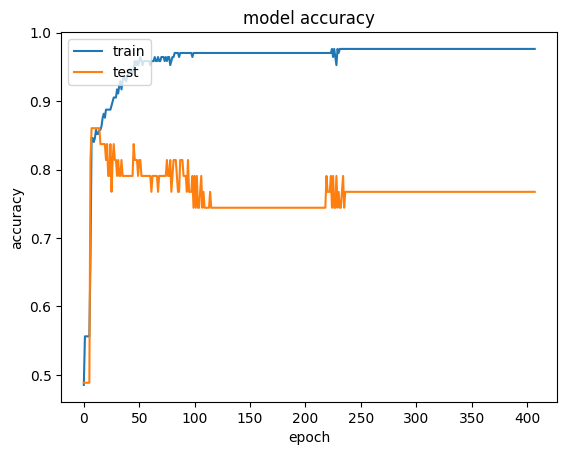

In [21]:
### 12. What does the plot generated by this code represent?
###     The plot generated by this code represent the accuracy of the model evaluated by using train dataset and test dataset.

plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

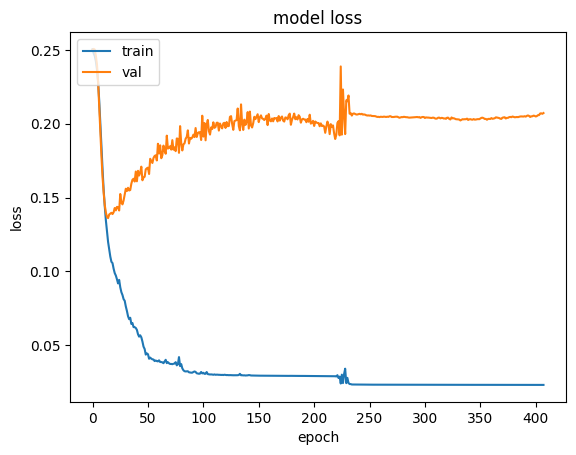

In [22]:
### 13. Plot code for the model loss. You can refer to the plot code for model accuracy above.
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('Loss.png',dpi=100) #to save the image
plt.show()

In [23]:
### 14. What is the purpose of evaluating the model on the test dataset?
###     The purpose purpose of evaluating the model on the test dataset is to evaluate the performance of the model build.
###     Also, this can help in detecting and preventing overfitting by providing an independent evaluation of the model's performance.

#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

3/3 [==============================] - 0s 5ms/step - loss: 0.1657 - acc: 0.8242

acc: 82.42%
loss: 0.17


In [24]:
#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

3/3 [==============================] - 0s 4ms/step
No: 1 Actual: [0]  Predicted: [0] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [1]  Predicted: [1] Result: Pass
No: 4 Actual: [0]  Predicted: [0] Result: Pass
No: 5 Actual: [1]  Predicted: [1] Result: Pass
No: 6 Actual: [1]  Predicted: [1] Result: Pass
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [0]  Predicted: [0] Result: Pass
No: 9 Actual: [0]  Predicted: [0] Result: Pass
No: 10 Actual: [1]  Predicted: [0]  Result: Fail
No: 11 Actual: [1]  Predicted: [1] Result: Pass
No: 12 Actual: [1]  Predicted: [0]  Result: Fail
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [1]  Predicted: [1] Result: Pass
No: 18 Actual: [0]  Predicted: [0] Result: Pass
No: 19 Actual: [0]  Predicted: [0] Result: Pass
No: 20 Actual: [0]  Predicted: [0] Result: 

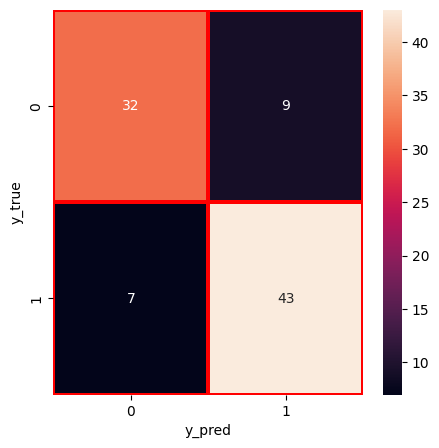


              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [25]:
### 15. What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.
###   Confusion matrix is a table that is often used to evaluate the performance of a classification model.
###   - True Positive (TP): This represents the cases where the model correctly predicted the positive class (e.g., presence of a condition) when the actual class was indeed positive.
###   - False Positive (FP): Also known as Type I error, this represents the cases where the model incorrectly predicted the positive class when the actual class was negative.
###   - False Negative (FN): Also known as Type II error, this represents the cases where the model incorrectly predicted the negative class when the actual class was positive.
###                           It's a case of the model failing to detect something that is actually present.
###   - True Negative (TN): This represents the cases where the model correctly predicted the negative class (e.g., absence of a condition) when the actual class was indeed negative.

### 16. Explain the classification report produce.

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

The overall accuracy for this model is 82%.
<br>
The macro average is 0.82, which is the average of precision, recall and f1 score calculated independently for each class.
<br>
The weighted average is 0.82, which is the average of precision, recall and f1 score weighted by support for each class.
- For Class 0:<br>
  -- The precision value is 0.82, which mean there are 82% of instances which predicted as class 0 are in class 0 in actual.<br>
  -- The recall value is 0.78, which mean that the model are correctly identify 78% of all actual class 0 instances.<br>
  -- The f1 score is 0.80, which is the harmonic mean of precision and recall value for class 0.<br>
  -- Support value for class 0 is 41, which mean there are 41 instances in class 0.<br>
  <br>
- For Class 1:<br>
  -- The precision value is 0.83, which mean there are 83% of instances which predicted as class 1 are in class 1 in actual.<br>
  -- The recall value is 0.86, which mean that the model are correctly identify 86% of all actual class 1 instances.<br>
  -- The f1 score is 0.84, which is the harmonic mean of precision and recall value for class 1.<br>
  -- Support value for class 1 is 50, which mean there are 50 instances in class 50.<br>